# Práctica Final Machine Learning      


### Ángela Cristina de Luna López y Marina Tévar Molina


### Aseguradora detección de siniestro

En esta práctica abordaremos un problema de clasificación de detección de siniestros. 
- Como variable objetivo tenemos una variable binaria que toma valores:

    `'1': percances graves (al menos una muerte) `
    `'2': percances leves (sin muertes) ` en un accidente de tráfico.

Realizaremos distintos modelos de clasificación para facilitar a la aseguradora la detección de posibles siniestros según características del conductor, medioambientales, del vehículo etc. 
Además de previamente preparar la base de datos para ello.

## 1. Carga de librerías

In [1]:
import numpy  as np  
import pandas as pd
import seaborn as sns 

import matplotlib.pyplot as plt # para dibujar
%matplotlib inline

## 2. Procesamiento de los datos

En primer lugar cargamos el conjunto de datos y lo mostramos. Añadimos el tipo `object` en las columnas 1,2,5 y 12 para corregir ciertos errores que podrían aparecer más adelante por existir diferencias de tipos en estas columnas. Hemos decidido elegir ese tipo en concreto ya que es el que mejor encaja por tener valores como `QQ` que más adelante veremos qué significan.

Además esta corrección de tipos ayudará a agrupar ciertos datos que se refieren a lo mismo pero que se denotan de forma distinta. Por ejemplo en el caso de `C_MNTH` el `01` y el `1` (mes de enero). Al convertirlo a `object` agrupará todo dentro del `01` y ahorraremos tener que hacer transformaciones más adelante.

In [2]:
car = pd.read_csv('NCDB_1999_to_2014.csv'
                  ,dtype={'C_MNTH': object, 'C_WDAY': object, 'C_VEHS': object, 'V_ID': object}) 
car.head()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,1999,01,1,20,2,02,34,UU,1,5,...,01,06,1990,01,M,41,11,1,UU,1
1,1999,01,1,20,2,02,34,UU,1,5,...,02,01,1987,01,M,19,11,1,UU,1
2,1999,01,1,20,2,02,34,UU,1,5,...,02,01,1987,02,F,20,13,2,02,2
3,1999,01,1,08,2,01,01,UU,5,3,...,01,01,1986,01,M,46,11,1,UU,1
4,1999,01,1,08,2,01,01,UU,5,3,...,99,NN,NNNN,01,M,05,99,2,UU,3


Veamos si en las columnas problemáticas se han agrupado los datos correctamente al hacer la conversión de tipos:

In [3]:
car['C_MNTH'].value_counts()

08    547045
07    537693
12    525748
06    520010
10    515911
09    512790
01    499874
11    499080
05    468235
02    423287
03    417814
04    392533
UU       385
Name: C_MNTH, dtype: int64

In [4]:
car['C_WDAY'].value_counts()

5    999725
4    869653
6    867188
3    825560
2    816265
1    776012
7    704679
U      1323
Name: C_WDAY, dtype: int64

In [5]:
car['C_VEHS'].value_counts()

02    3612440
01    1248443
03     739470
04     183036
05      44077
06      14389
07       5681
08       2670
09       1833
10       1193
11        861
12        644
14        547
UU        541
15        476
13        415
16        280
20        265
36        254
77        229
18        179
35        175
17        173
21        140
22        134
19        125
72        123
26        116
24        110
38        108
44        102
71         92
54         86
27         86
51         80
25         67
28         63
58         61
46         59
57         58
56         58
41         51
39         48
43         44
32         42
37         41
40         41
33         39
34         36
30         34
31         32
29         31
23         24
Name: C_VEHS, dtype: int64

In [6]:
car['V_ID'].value_counts()

01    3109283
02    2150414
03     298523
99     219337
04      58518
       ...   
74          2
77          2
85          1
83          1
75          1
Name: V_ID, Length: 82, dtype: int64

Vemos que efectivamente se agrupan de forma correcta

Observamos los tipos de las variables a través del comando `.info()`

In [7]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5860405 entries, 0 to 5860404
Data columns (total 22 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   C_YEAR  int64 
 1   C_MNTH  object
 2   C_WDAY  object
 3   C_HOUR  object
 4   C_SEV   int64 
 5   C_VEHS  object
 6   C_CONF  object
 7   C_RCFG  object
 8   C_WTHR  object
 9   C_RSUR  object
 10  C_RALN  object
 11  C_TRAF  object
 12  V_ID    object
 13  V_TYPE  object
 14  V_YEAR  object
 15  P_ID    object
 16  P_SEX   object
 17  P_AGE   object
 18  P_PSN   object
 19  P_ISEV  object
 20  P_SAFE  object
 21  P_USER  object
dtypes: int64(2), object(20)
memory usage: 983.6+ MB


### 2.1 Imputación de valores faltantes

Hacemos un estudio de los datos faltantes, usando el comando `isnull().sum()`, donde vemos que en principio no hay demasiados, pero es una información falsa ya que haciendo uso de la leyenda que se nos proporciona junto al dataset vemos que muchos de estos missings están codificados de otra forma y habrá que transformarlos.

In [8]:
car.isnull().sum()

C_YEAR    0
C_MNTH    0
C_WDAY    0
C_HOUR    0
C_SEV     0
C_VEHS    3
C_CONF    0
C_RCFG    0
C_WTHR    0
C_RSUR    0
C_RALN    0
C_TRAF    0
V_ID      0
V_TYPE    0
V_YEAR    0
P_ID      0
P_SEX     0
P_AGE     0
P_PSN     0
P_ISEV    0
P_SAFE    0
P_USER    0
dtype: int64

Estos valores faltantes a los que nos hemos referido previamente vienen reflejados como:

- `U` 
- `UU` 
- `UUUU`
- `Q` 
- `QQ`
- `QQQQ` 
- `N`
- `NN`
- `NNNN`
- `X`
- `XX`
- `XXXX`

Suponemos que se puede deber a situaciones en las que no se ha querido dar una respuesta, o que no se tenga por protección de datos etc. Por tanto para poder detectar estos datos como valores faltantes los cambiaremos por valores `NaN`.

Vemos cuántas veces aparece cada uno:

In [9]:
elementos = ['U','UU','UUUU','Q','QQ','QQQQ','N','NN','NNNN','X','XX','XXXX']
conteo = car.values.flatten().tolist().count(elementos[0]), car.values.flatten().tolist().count(elementos[1]), car.values.flatten().tolist().count(elementos[2]),car.values.flatten().tolist().count(elementos[3]),car.values.flatten().tolist().count(elementos[4]),car.values.flatten().tolist().count(elementos[5]),car.values.flatten().tolist().count(elementos[6]),car.values.flatten().tolist().count(elementos[7]),car.values.flatten().tolist().count(elementos[8]),car.values.flatten().tolist().count(elementos[9]),car.values.flatten().tolist().count(elementos[10]),car.values.flatten().tolist().count(elementos[11])
print(conteo)

(1093700, 2047678, 324122, 213832, 609752, 0, 305497, 843004, 260256, 0, 0, 0)


Muchos de estos faltantes se repiten varias veces en todo el dataset excepto los de tipo `X` que no existen, además de `QQQQ`, aunque nos hayan informado sobre ellos en la leyenda del conjunto de datos. 

Por tanto no será necesario inlcuirlos en la transformación.

In [10]:
car = car.replace(['U','UU','UUUU','Q','QQ','N','NN','NNNN'], np.nan)

Habiendo hecho esta transformación ya podemos hacer uso del comando anterior obteniendo resultados correctos.

Observamos la cantidad de missings que hay por variable:

In [11]:
car.isnull().sum()

C_YEAR          0
C_MNTH        385
C_WDAY       1323
C_HOUR      59409
C_SEV           0
C_VEHS        544
C_CONF     463999
C_RCFG     648946
C_WTHR     102988
C_RSUR     248668
C_RALN     463312
C_TRAF     305501
V_ID          433
V_TYPE     283111
V_YEAR     584378
P_ID        10992
P_SEX      249740
P_AGE      395156
P_PSN       97677
P_ISEV     371412
P_SAFE    1234284
P_USER     175586
dtype: int64

Vamos rellenando cada valor con la moda a través del siguiente bucle:

In [12]:
l=list(car.columns.values)
for i in range(22):
    car[l[i]].fillna(car[l[i]].mode()[0], inplace=True)

Comprobamos que ya no existen valores faltantes:

In [13]:
car.isnull().sum()

C_YEAR    0
C_MNTH    0
C_WDAY    0
C_HOUR    0
C_SEV     0
C_VEHS    0
C_CONF    0
C_RCFG    0
C_WTHR    0
C_RSUR    0
C_RALN    0
C_TRAF    0
V_ID      0
V_TYPE    0
V_YEAR    0
P_ID      0
P_SEX     0
P_AGE     0
P_PSN     0
P_ISEV    0
P_SAFE    0
P_USER    0
dtype: int64

Con este `.head()` vemos si se han rellenado los datos correctamente:

In [14]:
car.head()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,1999,01,1,20,2,02,34,02,1,5,...,01,06,1990,01,M,41,11,1,02,1
1,1999,01,1,20,2,02,34,02,1,5,...,02,01,1987,01,M,19,11,1,02,1
2,1999,01,1,20,2,02,34,02,1,5,...,02,01,1987,02,F,20,13,2,02,2
3,1999,01,1,08,2,01,01,02,5,3,...,01,01,1986,01,M,46,11,1,02,1
4,1999,01,1,08,2,01,01,02,5,3,...,99,01,2000,01,M,05,99,2,02,3


Por ejemplo en la fila 4 teníamos un missing en `V_YEAR` que se ha rellenado con el valor `2000` que sería el año más repetido. 

### 2.2 Estudio de elementos duplicados

Comprobamos el número de duplicados que tenemos en la totalidad de los datos

In [15]:
duplicate_rows = car[car.duplicated()]
print("numero de duplicados: ", duplicate_rows.shape)

numero de duplicados:  (6691, 22)


Los eliminamos:

In [16]:
car=car.drop_duplicates()

Comprobamos que se han eliminado correctamente:

In [17]:
duplicate_rows = car[car.duplicated()]
print("numero de duplicados: ", duplicate_rows.shape)

numero de duplicados:  (0, 22)


### 2.3 Conversión de tipos

Al tener un conjunto de datos que está formado en su mayoría por variables de tipo `object`, para poder trabajar con ellas en una matriz de correlaciones o para posteriores análisis las convertiremos a tipo `float`.

Para poder hacer esta conversión, concretamente para la variable `P_SEX` haremos una codificación para asignar la `F` a un 1 y la `M` a un 2. Haremos uso del Label Encoder

In [18]:
from sklearn.preprocessing import LabelEncoder

P_SEX=car['P_SEX'].values
enc = LabelEncoder()
label_encoder = enc.fit(P_SEX)
P_SEX = label_encoder.transform(P_SEX) + 1
label_dict = {1: "F", 2:"M"}

car['P_SEX']=P_SEX

P_SEX

array([2, 2, 1, ..., 1, 2, 2])

Convertimos el resto de variables:

In [19]:
car[['C_YEAR','C_MNTH','C_WDAY','C_HOUR','C_SEV','C_VEHS','C_CONF','C_RCFG','C_WTHR','C_RSUR','C_RALN','C_TRAF','V_ID','V_TYPE','V_YEAR','P_ID','P_SEX','P_AGE','P_PSN','P_ISEV','P_SAFE','P_USER']] = car[['C_YEAR','C_MNTH','C_WDAY','C_HOUR','C_SEV','C_VEHS','C_CONF','C_RCFG','C_WTHR','C_RSUR','C_RALN','C_TRAF','V_ID','V_TYPE','V_YEAR','P_ID','P_SEX','P_AGE','P_PSN','P_ISEV','P_SAFE','P_USER']].astype(float)

Nos aseguramos de que se ha hecho correctamente: 

In [20]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5853714 entries, 0 to 5860404
Data columns (total 22 columns):
 #   Column  Dtype  
---  ------  -----  
 0   C_YEAR  float64
 1   C_MNTH  float64
 2   C_WDAY  float64
 3   C_HOUR  float64
 4   C_SEV   float64
 5   C_VEHS  float64
 6   C_CONF  float64
 7   C_RCFG  float64
 8   C_WTHR  float64
 9   C_RSUR  float64
 10  C_RALN  float64
 11  C_TRAF  float64
 12  V_ID    float64
 13  V_TYPE  float64
 14  V_YEAR  float64
 15  P_ID    float64
 16  P_SEX   float64
 17  P_AGE   float64
 18  P_PSN   float64
 19  P_ISEV  float64
 20  P_SAFE  float64
 21  P_USER  float64
dtypes: float64(22)
memory usage: 1.0 GB


### 2.4 Outliers

Vamos a crear una función que nos elimine los outliers, pero de tal forma que vaya recorriendo las filas detectando la cantidad de outliers que tiene y si se considera que hay más de 2 eliminar directamente la observación.
Por esta razón es importante visualizar la longitud del data set previamente para comparar cómo varía su dimesión una vez eliminados los outliers.

In [21]:
len(car)

5853714

In [22]:
def filtrar_outlier_tukey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3 - q1 
    print("[q1=%f, q3=%f, iqr=%f]" % (q1, q3, iqr))
    
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    print("[floor=%f, ceiling=%f]" % (floor, ceiling))
    
    outlier_indices = list(x.index[(x < floor)|(x > ceiling)])
    outlier_values = list(x[outlier_indices])

    return outlier_indices, outlier_values

In [23]:
for i in range(22):
    outlier_indices, outlier_values = filtrar_outlier_tukey(car[l[i]])
for i in range(22):
    contador=0
    borrar=0
    j=0
    while j<=(i+1)*21:
        if outlier_indices[j] in range(i*22, 22+(i)*22):
            contador=contador+1
            j=j+1
        else:
            j=j+1
        if contador>=2:
            if borrar==0:
                car.drop([i], axis=0, inplace=True)
            borrar=1
car

[q1=2002.000000, q3=2010.000000, iqr=8.000000]
[floor=1990.000000, ceiling=2022.000000]
[q1=4.000000, q3=10.000000, iqr=6.000000]
[floor=-5.000000, ceiling=19.000000]
[q1=2.000000, q3=6.000000, iqr=4.000000]
[floor=-4.000000, ceiling=12.000000]
[q1=10.000000, q3=17.000000, iqr=7.000000]
[floor=-0.500000, ceiling=27.500000]
[q1=2.000000, q3=2.000000, iqr=0.000000]
[floor=2.000000, ceiling=2.000000]
[q1=2.000000, q3=2.000000, iqr=0.000000]
[floor=2.000000, ceiling=2.000000]
[q1=21.000000, q3=33.000000, iqr=12.000000]
[floor=3.000000, ceiling=51.000000]
[q1=1.000000, q3=2.000000, iqr=1.000000]
[floor=-0.500000, ceiling=3.500000]
[q1=1.000000, q3=2.000000, iqr=1.000000]
[floor=-0.500000, ceiling=3.500000]
[q1=1.000000, q3=2.000000, iqr=1.000000]
[floor=-0.500000, ceiling=3.500000]
[q1=1.000000, q3=1.000000, iqr=0.000000]
[floor=1.000000, ceiling=1.000000]
[q1=1.000000, q3=18.000000, iqr=17.000000]
[floor=-24.500000, ceiling=43.500000]
[q1=1.000000, q3=2.000000, iqr=1.000000]
[floor=-0.5000

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,1999.0,1.0,1.0,20.0,2.0,2.0,34.0,2.0,1.0,5.0,...,1.0,6.0,1990.0,1.0,2.0,41.0,11.0,1.0,2.0,1.0
1,1999.0,1.0,1.0,20.0,2.0,2.0,34.0,2.0,1.0,5.0,...,2.0,1.0,1987.0,1.0,2.0,19.0,11.0,1.0,2.0,1.0
2,1999.0,1.0,1.0,20.0,2.0,2.0,34.0,2.0,1.0,5.0,...,2.0,1.0,1987.0,2.0,1.0,20.0,13.0,2.0,2.0,2.0
3,1999.0,1.0,1.0,8.0,2.0,1.0,1.0,2.0,5.0,3.0,...,1.0,1.0,1986.0,1.0,2.0,46.0,11.0,1.0,2.0,1.0
4,1999.0,1.0,1.0,8.0,2.0,1.0,1.0,2.0,5.0,3.0,...,99.0,1.0,2000.0,1.0,2.0,5.0,99.0,2.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860400,2014.0,8.0,5.0,16.0,2.0,2.0,21.0,1.0,1.0,1.0,...,13.0,7.0,2000.0,1.0,2.0,24.0,11.0,1.0,2.0,1.0
5860401,2014.0,8.0,5.0,23.0,2.0,1.0,6.0,5.0,1.0,1.0,...,1.0,14.0,2006.0,1.0,2.0,29.0,96.0,2.0,9.0,5.0
5860402,2014.0,8.0,5.0,14.0,2.0,1.0,2.0,1.0,1.0,5.0,...,1.0,1.0,2006.0,1.0,1.0,18.0,11.0,2.0,1.0,1.0
5860403,2014.0,8.0,5.0,22.0,1.0,1.0,6.0,1.0,2.0,4.0,...,1.0,22.0,2000.0,1.0,2.0,67.0,12.0,3.0,1.0,1.0


Podemos observar que no tenemos más de dos outliers por fila por tanto decidimos no eliminarlos porque podríamos perder información importante.

### 2.5 Balanceo de datos

Vemos que en el caso de la variable objetivo tenemos una gran descompensación entre el valor 1 y 2

In [24]:
car['C_SEV'].value_counts()

2.0    5755101
1.0      98613
Name: C_SEV, dtype: int64

Por tanto haremos uso de las técnicas de balanceo para ver cómo se comportan los datos con cada una de ellas. En principio el análisis gráfico lo haremos con la técnica de undersampling ya que consideramos que para este caso puede dar resultados más realistas y además es computacionalmente más eficiente. El mismo criterio aplicaremos para los modelos más adelante, ya que al tener 5 millones de datos la técnica de oversampling es inviable.

Para crear este balanceo en el caso de oversampling utilizaremos `SMOTE` que aborda este desequilibrio generando ejemplos sintéticos de la clase minoritaria para equilibrar la proporción de las clases. Funciona al seleccionar aleatoriamente una instancia de la clase minoritaria y luego encontrar sus k vecinos más cercanos en el espacio de características. Luego, se crea un nuevo ejemplo sintético interpolando características entre la instancia seleccionada y sus vecinos.

#### Oversampling

In [25]:
#Oversampling
from imblearn.over_sampling import SMOTE

ros = SMOTE(random_state = 0)
X_res, y_res = ros.fit_resample(car[['C_YEAR', 'C_MNTH', 'C_WDAY',
       'C_HOUR', 'C_SEV', 'C_VEHS',
       'C_CONF', 'C_RCFG', 'C_WTHR',
       'C_RSUR', 'C_RALN', 'C_TRAF',
       'V_ID', 'V_TYPE', 'V_YEAR',
       'P_ID', 'P_SEX',
       'P_AGE', 'P_PSN',
       'P_ISEV', 'P_SAFE',
       'P_USER']], car[['C_SEV']])
print('Filas totales:' , len(y_res))

Filas totales: 11510202


In [26]:
car_oversampled = pd.DataFrame(X_res)
car_oversampled['C_SEV']=y_res

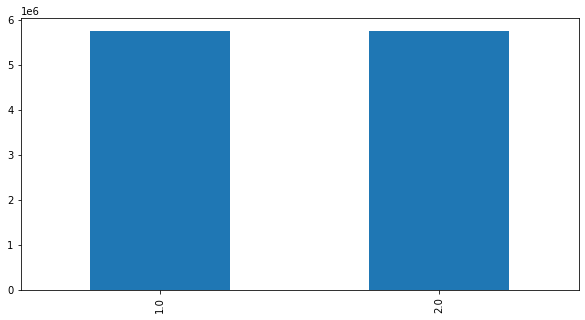

In [27]:
car_oversampled['C_SEV'].value_counts().plot.bar(figsize=(10,5))
plt.show()

Para el caso de undersampling utilizaremos la técnica de submuestreo aleatorio (Random Under Sampling) para abordar el desequilibrio de clases en un conjunto de datos. Esta técnica ayuda a equilibrar las clases reduciendo aleatoriamente la cantidad de muestras en la clase mayoritaria.

#### Undersampling

In [28]:
#Undersampling
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state = 0)
X_rus, y_rus = rus.fit_resample(car[['C_YEAR', 'C_MNTH', 'C_WDAY',
       'C_HOUR', 'C_SEV', 'C_VEHS',
       'C_CONF', 'C_RCFG', 'C_WTHR',
       'C_RSUR', 'C_RALN', 'C_TRAF',
       'V_ID', 'V_TYPE', 'V_YEAR',
       'P_ID', 'P_SEX',
       'P_AGE', 'P_PSN',
       'P_ISEV', 'P_SAFE',
       'P_USER']], car[['C_SEV']])
print('Filas totales:', len(rus.sample_indices_))

Filas totales: 197226


In [29]:
car_undersampled = pd.DataFrame(X_rus)
car_undersampled['C_SEV']=y_rus

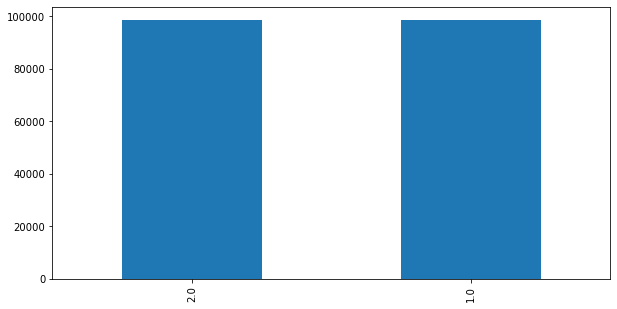

In [30]:
car_undersampled['C_SEV'].value_counts().plot.bar(figsize=(10,5))
plt.show()

### 2.6 Análisis exploratorio 

### 2.6.1 Análisis gráfico

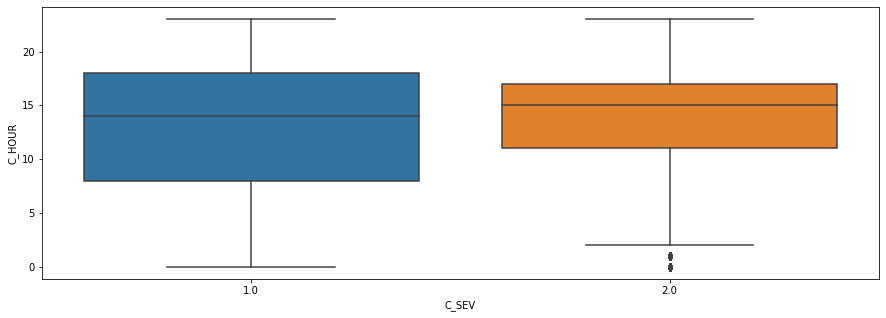

In [31]:
plt.figure(figsize=(15,5))
sns.boxplot(x='C_SEV',y='C_HOUR',data=car_undersampled)

En este gráfico vemos como están repartidos los accidentes a lo largo del día según si son graves (1) o leves (2). Observamos que la dispersión de los datos es muy parecida, y en el caso de los accidentes leves vemos que hay outliers en la parte inferior. 

También podemos apreciar como el 50% de los accidentes leves se ecuentran más concentrados en una franja horaria más pequeña que los graves. Esto se podría deber a que los accidentes graves ocurren con mayor frecuencia en horarios de mayor oscuridad y menor visibilidad en las carreteras. 

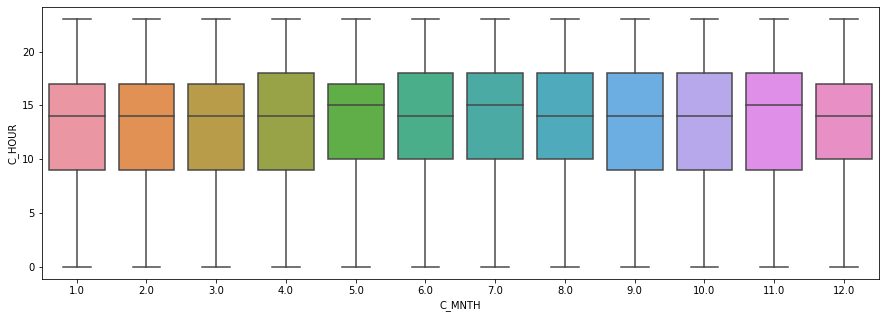

In [32]:
plt.figure(figsize=(15,5))
sns.boxplot(x='C_MNTH',y='C_HOUR',data=car_undersampled)

En este gráfico vemos como están repartidos los accidentes en el día según el mes, observamos que la dispersión de los datos es casi idéntica, y podemos destacar que en el mes 5, correspondiente a mayo, y el 12, que es diciembre, la franja horaria en la que ocurren el 50% de los accidentes es menor.

También podemos decir que salvo en los meses 6 y 8, en los cuales la mediana se encuentra en el centro; en el resto  vemos que tienen todos simetría negativa, lo que nos indica que los datos se concentran en la parte superior.

Apreciamos también como en los meses de verano (de mayo a agosto) se concentran las cajas y esto puede ser debido a que hay más luz a primera hora de la mañana en las carreteras y se producen menos accidentes en esas franjas horarias. Además las personas se encuentran de vacaciones y hacen menos desplazamientos a los trabajos a primera hora.

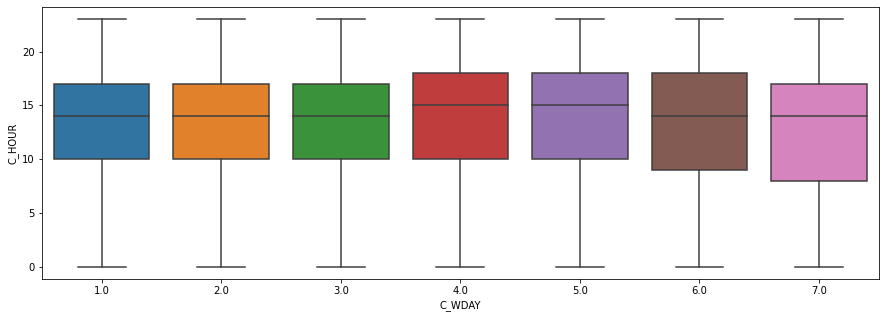

In [33]:
plt.figure(figsize=(15,5))
sns.boxplot(x='C_WDAY',y='C_HOUR',data=car_undersampled)

Aquí vemos como están repartidos los accidentes según la hora y el día de la semana en el que nos encontremos, observamos que la dispersión de los datos es casi idéntica, y podemos destacar que durante los tres primeros días de la semana, es decir, lunes, martes y miércoles la franja horaria en la que acurren el 50% de los accidentes es menor. Además vemos que tienen todos simetría negativa, lo que nos indica que los datos se encuentran más concentrados en la parte superior.

Podríamos decir que durante el fin de semana las cajas tienen mayor tamaño ya que como las personas no trabajan y suelen realizar más desplazamientos ya sea por ocio o para irse de vacaciones, los accidentes se repartirán durante más horas del día, es decir estarán más dispersos.

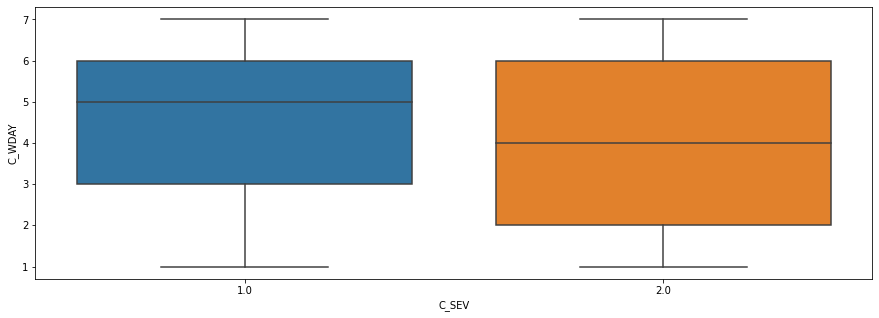

In [34]:
plt.figure(figsize=(15,5))
sns.boxplot(x='C_SEV',y='C_WDAY',data=car_undersampled)

En este gráfico vemos como están repartidos los accidentes en los días la semana según si son graves o leves
- Observamos que el 50% de los accidentes graves ocurren entre el miércoles y el sábado, y mirando la posición en la que se encuentra la mediana podemos decir que el número de accidentes se concentra mucho más entre el viernes y el sábado que entre el miercoles y el viernes, algo que tiene mucho sentido ya que los viernes y sabados la gente realiza muchos más desplazamientos fuera de las ciudades para trasladarse a segundas residencias o a visitar a familiares, con lo cual tienen que tomar carreteras que permiten alcanzar velocidades mucho más altas y con menos controles que cuando conducen entre semana por la ciudad, así los accidentes que pueda haber tendrán consecuencias más graves.

- En cuanto a los accidentes leves observamos que 50% de los accidentes ocurren entre el martes y el sábado y que la concentración de estos es igual entre el martes y el jueves que entre el jueves y el sábado. 

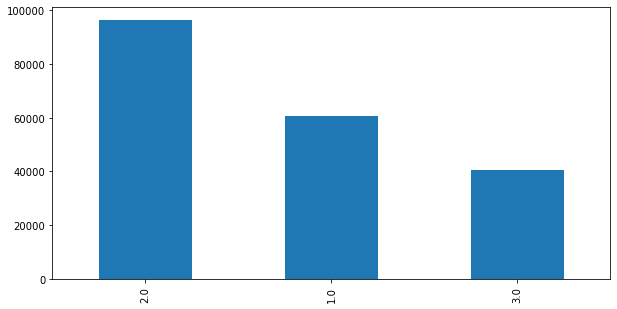

In [35]:
car_undersampled['P_ISEV'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title("")
plt.ylabel('')
plt.xlabel('');

En este gráfico podemos ver como están distribuidos los accidentes en los 15 años en los que se hace el estudio en función de sin son:
- accidentes sin heridos (1)
- accidentes en los que hay heridos (2)
- accidentes con víctimas mortales (3)

Observamos que la mayoría de accidentes son del grupo 2, es decir que alguien sale herido pero sin víctimas mortales, y que los accidentes menos comunes son los que incluyen víctimas mortales.

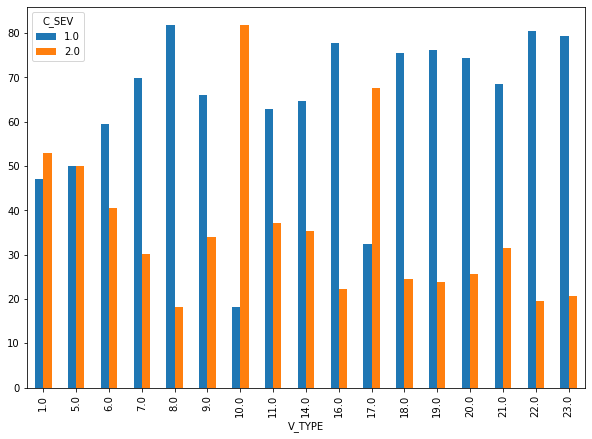

In [36]:
plot = pd.crosstab(index=car_undersampled['V_TYPE'],
            columns=car_undersampled['C_SEV']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar',figsize=(10,7))

En este gráfico podemos ver como están distribuidos los accidentes según si son graves (1) o leves (2) en función del tipo de vehículo con el que se han producido:

Tipos de vehículos:
- 1: Light Duty Vehicle
- 5: Panel/cargo van
- 6: Other trucks and vans
- 7: Unit trucks
- 8: Road tractor
- 9: School bus
- 10: Smaller school bus
- 11: Urban and Intercity Bus
- 14: Motorcycle and moped
- 16: Off road vehicles
- 17: Bicycle
- 18: Purpose-built motorhome
- 19: Farm equipment
- 20: Construction equipment
- 21: Fire engine
- 22: Snowmobile
- 23: Street car

Dentro de los __accidentes graves__ podemos decir que 
- Con los vehículos que más se producen son Road tractor (8), Snowmobile (22) y Street car (23), algo que tiene bastante sentido ya que el road tractor es un medio de transporte de gran embergadura y cualquier accidente en el que se vea involucrado tendrá heridos graves, de la misma manera la moto de nieve es un vehículo muy veloz y si se sufre un accidente conduciéndolo es muy probable salir herido de gravedad, y por último el coche, que es el medio de transporte más utilizado y hay muchos accidentes al día, muchos de ellos con consecuencias fatales. Mientras que con Smaller school bus (10) apenas hay accidentes de este tipo.


- Y dentro de los __accidentes leves__ podemos decir que con los vehículos que más se producen son Smaller school bus (10) o Bicycle (17), resultado muy coherentes ya que los autobuses escolares toman siempre muchas precauciones y no circulan a grandes velocidades ya que transportan a los niños pequeños, y las bicicletas que también es un medio de transporte en el que se toman muchas precauciones para usarlo y la gente suele ser muy precavida de forma que si hay accidentes salgan mínimamente heridos. Mientras que con Road tractor (8), Snowmobile (22) y Street car (23) apenas hay accidentes de este tipo.

In [37]:
plot = pd.crosstab(index=car_undersampled['V_YEAR'],
            columns=car_undersampled['C_SEV']).apply(lambda r: r/r.sum() *20000,
                                              axis=1).plot(kind='bar',figsize=(250,80))

En este gráfico podemos ver como están distribuidos los accidentes según si son graves (1) o leves (2) a lo largo de todos los años del estudio, 
- Se puede ver como hasta 1955 la gran mayoría de accidentes eran de gravedad, esto se puede deber a que los coches de la época no estaban equipados con muchas medidas de seguridad como el cinturón, no se regulaban tanto los límites de velocidad...etc.


- A partir de ese momento y hasta 1989 podemos ver como cada vez las cifras de accidentes leves van creciendo hasta igualarse con las de los accidentes graves, esta disminución de los accidentes graves puede deberse a que en este período de tiempo, entre 1970-1980 se hizo obligatorio el uso de cinturones en Canada, lo que provocó una disminución considerable de víctimas mortales en accidentes.


- Desde 1989 y hasta el 2015 observamos como cada vez hay más accidentes leves y en los últimos años de estudio como las cifras de accidentes graves son mucho menores que las de los leves, debido a la cantidad de controles de tráfico y medidas de seguridad que se han ido añadiendo con el paso de los años.

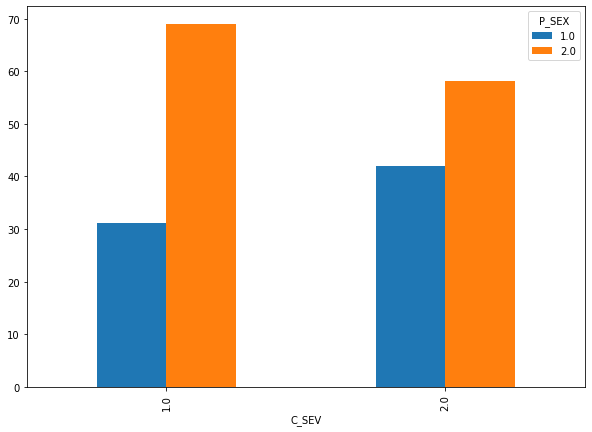

In [38]:
plot = pd.crosstab(index=car_undersampled['C_SEV'],
            columns=car_undersampled['P_SEX']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar',figsize=(10,7))

Si estudiamos ahora la gravedad de los accidentes en función de si son hombres o mujeres, podemos decir que tanto los __accidentes graves__ como los __accidentes leves__ son más comunes en hombres (P_SEX 2); 

Es decir podemos concluir que los hombres son más propensos a tener accidentes, ya sea de un tipo o del otro, que las mujeres.

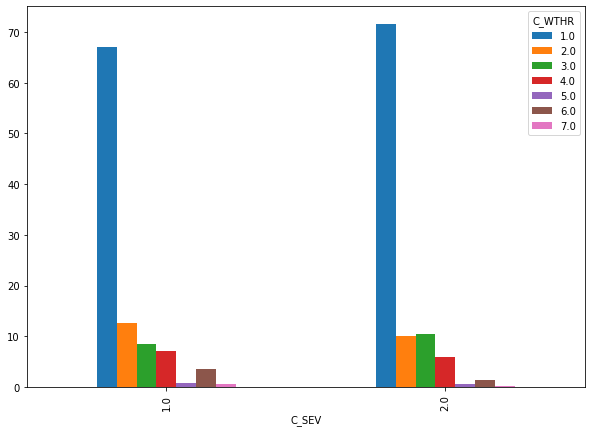

In [39]:
plot = pd.crosstab(index=car_undersampled['C_SEV'],
            columns=car_undersampled['C_WTHR']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar',figsize=(10,7))

En este gráfico podemos ver como están distribuidos los accidentes según si son graves (1) o leves (2) en función de la condición climática, donde:
- 1 : Clear and sunny
- 2 : Overcast, cloudy but no precipitation
- 3 : Raining
- 4 : Snowing, not including drifting snow
- 5 : Freezing rain, sleet, hail
- 6 : Visibility limitation
- 7 : Strong wind

Observamos que tanto los accidentes graves como los leves ocurren mayoritariamente cuando el día esta despejado y con sol, esto puede ocurrir ya que durante los meses de verano (que es cuando predomina este tiempo), hay un mayor flujo de vehículos en las carreteras debido a las vacaciones y los viajes. Esto puede llevar a situaciones de congestión, distracciones y comportamientos imprudentes, lo que aumenta el riesgo de accidentes. 

También puede ser debido a un exceso de confianza ya que cuando el clima es perfecto y las condiciones de conducción son óptimas, algunos conductores pueden volverse demasiado confiados y relajar su atención y precaución en la carretera. Esta excesiva confianza puede llevar a una menor atención y mayor velocidad, aumentando así el riesgo de accidentes. 

Otra causa puede ser la fatiga o somnolencia, ya que los días soleados y cálidos pueden provocar una sensación de relajación en algunos conductores, que afecta negativamente la capacidad de atención y reacción al volante, aumentando el riesgo de accidentes.

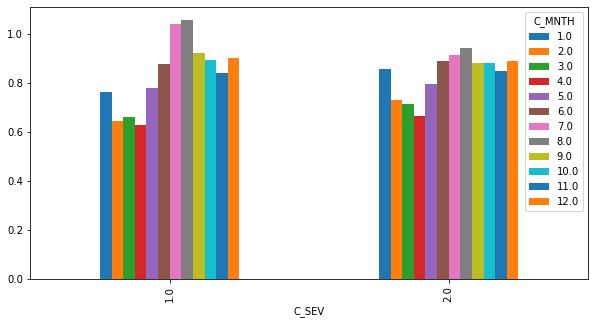

In [40]:
plot = pd.crosstab(index=car_undersampled['C_SEV'],
            columns=car_undersampled['C_MNTH']).apply(lambda r: r/r.sum() *10,
                                              axis=1).plot(kind='bar',figsize=(10,5))

En este gráfico podemos ver como están distribuidos los accidentes según si son graves (1) o leves (2) en función del mes en el que nos encontremos; Podemos ver claramente como los accidentes tanto graves como leves ocurren más durante aquellos meses en los que la población de Canadá se encuentra de vacaciones como son, julio, agosto, septiembre y diciembre, meses en los que como ya hemos mencionado en el análisis del gráfico anterior hay un mayor flujo de vehículos en las carreteras, que incrementea el número de accidentes. 

Mientras que en los meses que no hay vacaciones como son febrero, marzo, abril y mayo el número de accidentes de ambos tipos es considerablemente menor.

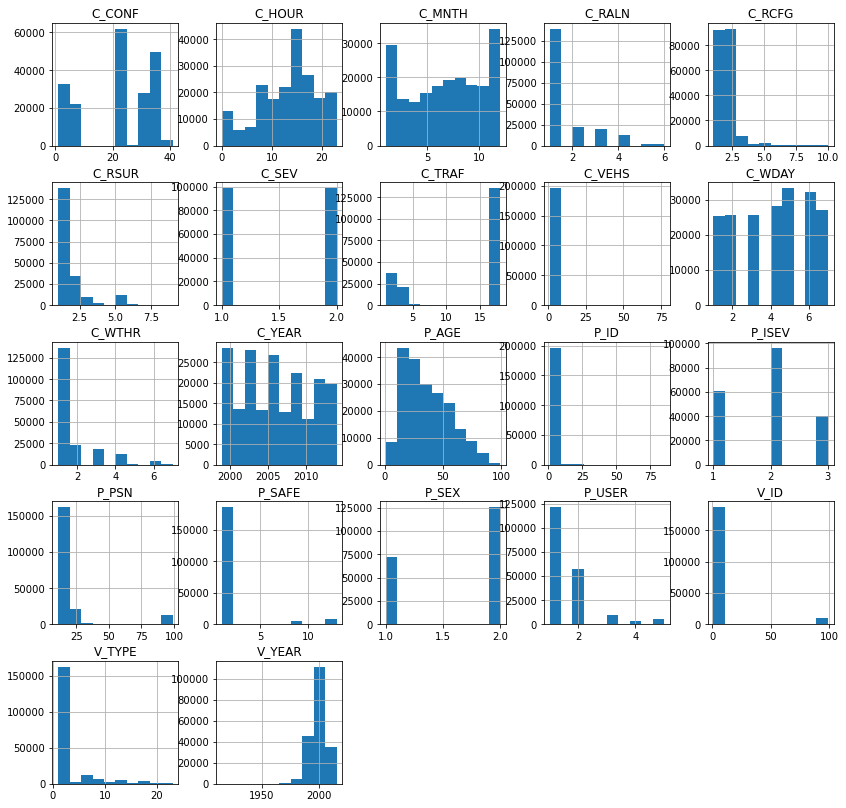

In [41]:
car_undersampled.hist(figsize=(14,14), rwidth=3)
plt.show()

### 2.6.2 Análisis descriptivo y de correlaciones

Hacemos un descriptivo previo:

In [42]:
car.describe()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
count,5.853714e+06,5.853714e+06,5.853714e+06,5.853714e+06,5.853714e+06,5.853714e+06,5.853714e+06,5.853714e+06,5.853714e+06,5.853714e+06,...,5.853714e+06,5.853714e+06,5.853714e+06,5.853714e+06,5.853714e+06,5.853714e+06,5.853714e+06,5.853714e+06,5.853714e+06,5.853714e+06
mean,2.006000e+03,6.714415e+00,4.010920e+00,1.372203e+01,1.983154e+00,2.045852e+00,2.256534e+01,1.748641e+00,1.595568e+00,1.558376e+00,...,5.191416e+00,2.190086e+00,1.998663e+03,1.457389e+00,1.583468e+00,3.516326e+01,1.640150e+01,1.601703e+00,2.391395e+00,1.487906e+00
std,4.569747e+00,3.433547e+00,1.932521e+00,5.176620e+00,1.286951e-01,1.269222e+00,1.110148e+01,7.414495e-01,1.109147e+00,1.092825e+00,...,1.851091e+01,3.525237e+00,6.777966e+00,1.203935e+00,4.929839e-01,1.833025e+01,1.803184e+01,5.034291e-01,2.016564e+00,8.377041e-01
min,1.999000e+03,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.901000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.100000e+01,1.000000e+00,1.000000e+00,1.000000e+00
25%,2.002000e+03,4.000000e+00,2.000000e+00,1.000000e+01,2.000000e+00,2.000000e+00,2.100000e+01,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.994000e+03,1.000000e+00,1.000000e+00,2.000000e+01,1.100000e+01,1.000000e+00,2.000000e+00,1.000000e+00
50%,2.006000e+03,7.000000e+00,4.000000e+00,1.500000e+01,2.000000e+00,2.000000e+00,2.100000e+01,2.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,2.000000e+03,1.000000e+00,2.000000e+00,3.200000e+01,1.100000e+01,2.000000e+00,2.000000e+00,1.000000e+00
75%,2.010000e+03,1.000000e+01,6.000000e+00,1.700000e+01,2.000000e+00,2.000000e+00,3.300000e+01,2.000000e+00,2.000000e+00,2.000000e+00,...,2.000000e+00,1.000000e+00,2.003000e+03,2.000000e+00,2.000000e+00,4.800000e+01,1.300000e+01,2.000000e+00,2.000000e+00,2.000000e+00
max,2.014000e+03,1.200000e+01,7.000000e+00,2.300000e+01,2.000000e+00,7.700000e+01,4.100000e+01,1.000000e+01,7.000000e+00,9.000000e+00,...,9.900000e+01,2.300000e+01,2.015000e+03,9.900000e+01,2.000000e+00,9.900000e+01,9.900000e+01,3.000000e+00,1.300000e+01,5.000000e+00


Obtenemos la matriz de correlaciones:

In [43]:
plt.figure(figsize=(10,5))
correlaciones= car.corr()
correlaciones

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
C_YEAR,1.000000,-0.000413,-0.014094,-0.008635,0.005573,0.003696,-0.008751,-0.020373,0.001085,0.013864,...,0.019383,0.003680,0.602174,-0.003301,-0.011338,0.052401,0.011485,0.004570,0.016934,0.007186
C_MNTH,-0.000413,1.000000,0.003675,0.019764,-0.005856,-0.017491,-0.012697,-0.002857,-0.025552,-0.096660,...,0.005497,0.013762,0.032455,-0.000616,0.002196,0.003641,0.007406,0.002568,0.007821,0.023907
C_WDAY,-0.014094,0.003675,1.000000,-0.014033,-0.018162,-0.016411,-0.025112,-0.018192,0.009665,-0.000913,...,-0.020718,-0.019716,-0.013453,0.051094,0.004405,-0.046476,-0.003871,0.003498,-0.011515,0.040952
C_HOUR,-0.008635,0.019764,-0.014033,1.000000,0.018396,0.017883,0.060530,0.021379,-0.021305,-0.045323,...,0.007900,0.006682,-0.010488,0.012773,-0.025452,-0.019391,0.013227,-0.037553,0.009254,0.053033
C_SEV,0.005573,-0.005856,-0.018162,0.018396,1.000000,-0.017839,0.023893,0.040741,-0.017925,-0.007344,...,-0.019491,-0.029209,0.007991,-0.031811,-0.028007,-0.017799,-0.028459,-0.156800,-0.011365,-0.021622
C_VEHS,0.003696,-0.017491,-0.016411,0.017883,-0.017839,1.000000,0.265527,0.015685,0.032214,-0.020826,...,-0.112024,-0.030830,0.025222,0.007567,0.003437,0.020391,-0.140221,-0.108113,-0.063161,-0.096214
C_CONF,-0.008751,-0.012697,-0.025112,0.060530,0.023893,0.265527,1.000000,0.207468,-0.063259,-0.102071,...,-0.227057,0.021359,-0.011765,-0.000111,-0.013727,0.042450,-0.219111,-0.116474,-0.074716,-0.081080
C_RCFG,-0.020373,-0.002857,-0.018192,0.021379,0.040741,0.015685,0.207468,1.000000,-0.056847,-0.064437,...,0.015415,0.002848,-0.021127,-0.008779,-0.015375,0.024663,0.006593,-0.045194,0.017378,0.004397
C_WTHR,0.001085,-0.025552,0.009665,-0.021305,-0.017925,0.032214,-0.063259,-0.056847,1.000000,0.462936,...,-0.010172,-0.036183,0.001283,0.015196,-0.003773,-0.007543,-0.017589,0.034332,-0.030991,-0.052915
C_RSUR,0.013864,-0.096660,-0.000913,-0.045323,-0.007344,-0.020826,-0.102071,-0.064437,0.462936,1.000000,...,-0.021587,-0.035474,0.005825,0.013799,-0.008375,-0.017637,-0.028771,0.055668,-0.018330,-0.070559


<Figure size 720x360 with 0 Axes>

Las variables tienen una baja correlación entre sí esto se puede deber en parte al desbalanceo de los datos.
Representamos estas correlaciones en un mapa de calor para que se aprecie mejor lo bajas que son.

<Figure size 720x360 with 0 Axes>

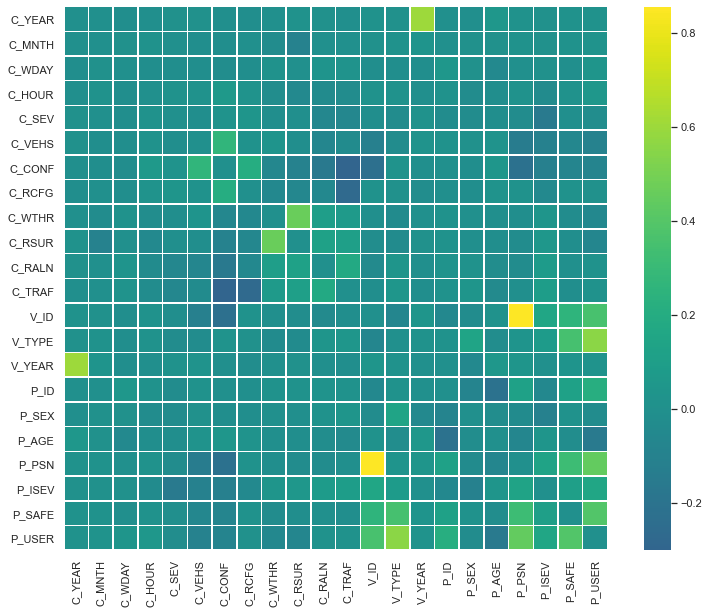

'Gráfico de correlación usando coeficiente de pearson'

In [44]:
plt.figure(figsize=(10,5))
correlaciones= car.corr()
def get_corr_matrix(dataset = None, metodo='pearson', size_figure=[13,10]):
    # Para obtener la correlación de Spearman, sólo cambiar el metodo por 'spearman'

    if dataset is None:
        print(u'\nHace falta pasar argumentos a la función')
        return 1
    sns.set(style="white")
    # Compute the correlation matrix
    corr = dataset.corr(method=metodo) 
    # Set self-correlation to zero to avoid distraction
    for i in range(corr.shape[0]):
        corr.iloc[i, i] = 0
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=size_figure)
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, center=0,
                square=True, linewidths=.5,  cmap ='viridis' ) #cbar_kws={"shrink": .5}
    plt.show()
    
    return ('Gráfico de correlación usando coeficiente de' + ' ' + metodo)

get_corr_matrix(car,'pearson',[13,10])

Veamos las correlaciones respecto de la variable objetivo con el balanceo hecho:

#### Undersampling

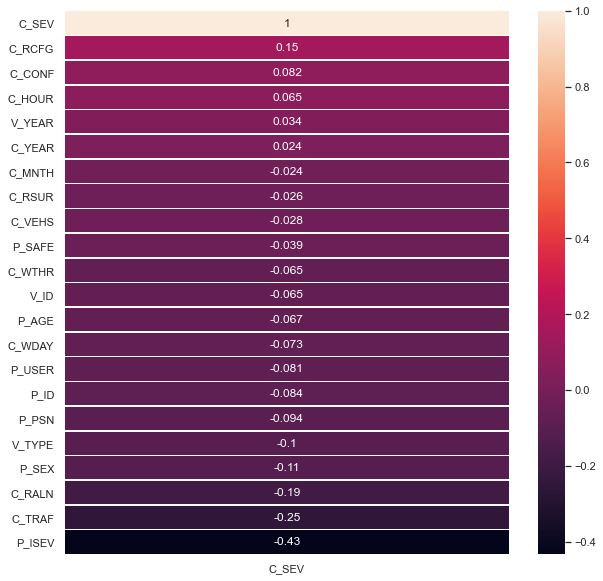

In [45]:
corr = car_undersampled.corr()[['C_SEV']].sort_values(by='C_SEV', ascending=False)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot=True,linewidths=.5, ax=ax)
plt.show()

#### Oversampling

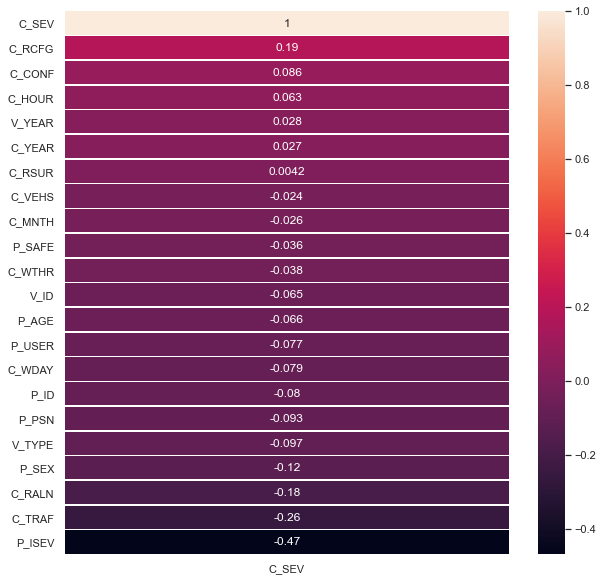

In [46]:
corr = car_oversampled.corr()[['C_SEV']].sort_values(by='C_SEV', ascending=False)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot=True,linewidths=.5, ax=ax)
plt.show()

Vemos que hay una mejora leve en las correlaciones, para el caso de oversampling es mejor que en undersampling pero no con una excesiva diferencia.

Por tanto no vamos a utilizar las correlaciones como método para la selección de variables, ya que al ser en general tan bajas no nos da una idea representativa de qué variables son más o menos importantes.

Haremos uso de otro tipo de técnicas más adelante.

Vamos a hacer un Encoding para observar qué variables influyen sobre la categoría de `C_SEV` de accidentes con muertes (que sería la categoría `1`)

In [47]:
from sklearn.preprocessing import OneHotEncoder

In [48]:
#ONE HOT ENCODING PARA 'C_SEV'
ohe = OneHotEncoder()
oh_array = ohe.fit_transform(car_undersampled['C_SEV'].values.reshape(-1, 1)).toarray()
oh_df = pd.DataFrame(oh_array,columns=['C_SEV_1','C_SEV_2'])
oh_df

,C_SEV_1,C_SEV_2
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
197221,0.0,1.0
197222,0.0,1.0
197223,0.0,1.0
197224,0.0,1.0


In [49]:
car_undersampled=car_undersampled.merge(oh_df,how='left',left_index=True,right_index=True)

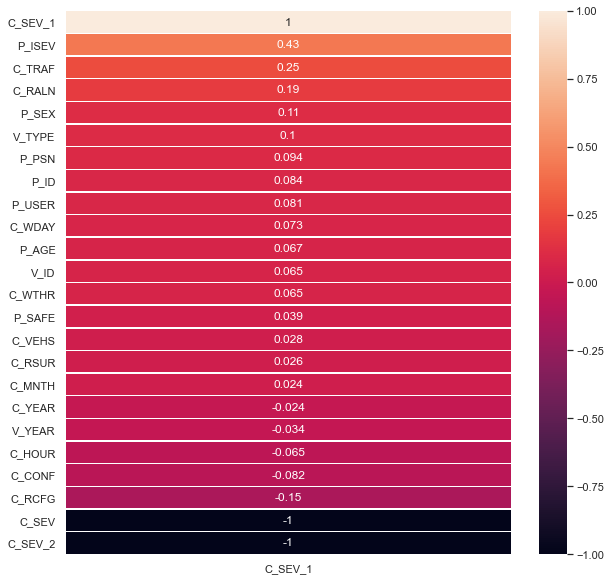

In [50]:
corr = car_undersampled.corr()[['C_SEV_1']].sort_values(by='C_SEV_1', ascending=False)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot=True,linewidths=.5, ax=ax)
plt.show()

Observamos que la variable __C_SEV_1__ va a tener una correlación positiva con 16 de ellas, lo que quiere decir que varían en el mismo sentido; además cuanto más se acerque el valor de estás correlaciones a +1, más fuerte será la relación. 

Por otra parte podemos ver que tendrá correlación negativa con las 5 restantes, esto quiere decir que las variables se mueven en la dirección opuesta, por lo que si una variable aumenta, la otra variable disminuye con la misma magnitud.

Podemos ver que la variable con la que más correlación tiene es P_ISEV esto es debido a que ambas explican lo mismo, estudian la gravedad de los accidentes entonces si una toma un valor alto, la otra también lo tomará.

La siguiente variable con más correlación es C_TRAF, que nos indica las colisiones debido a diversos controles de tráfico, por lo que podemos decir que esta es la mayor causa por la que existen fallecimientos en los accidentes; a continuación estudiamos más a fondo cúal dentro de esta variable es la que más correlación tiene.

In [51]:
#ONE HOT ENCODING PARA 'C_TRAF'
ohe = OneHotEncoder()
oh_array = ohe.fit_transform(car_undersampled['C_TRAF'].values.reshape(-1, 1)).toarray()
oh_df = pd.DataFrame(oh_array,columns=['C_TRAF_1','C_TRAF_2','C_TRAF_3','C_TRAF_4','C_TRAF_5','C_TRAF_6','C_TRAF_7','C_TRAF_8','C_TRAF_9','C_TRAF_10','C_TRAF_11','C_TRAF_12','C_TRAF_13','C_TRAF_15','C_TRAF_16','C_TRAF_17','C_TRAF_18'])
oh_df

,C_TRAF_1,C_TRAF_2,C_TRAF_3,C_TRAF_4,C_TRAF_5,C_TRAF_6,C_TRAF_7,C_TRAF_8,C_TRAF_9,C_TRAF_10,C_TRAF_11,C_TRAF_12,C_TRAF_13,C_TRAF_15,C_TRAF_16,C_TRAF_17,C_TRAF_18
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
197222,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
197224,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
car_undersampled2 =car_undersampled.merge(oh_df,how='left',left_index=True,right_index=True)

In [53]:
car_undersampled2.drop(['C_MNTH','C_HOUR','C_YEAR','C_WDAY','C_VEHS','C_CONF','C_RCFG','C_WTHR','C_RSUR','C_RALN','V_ID','V_TYPE','V_YEAR','P_ID','P_SEX','P_AGE','P_PSN','P_ISEV','P_SAFE','P_USER'],axis=1,inplace=True)

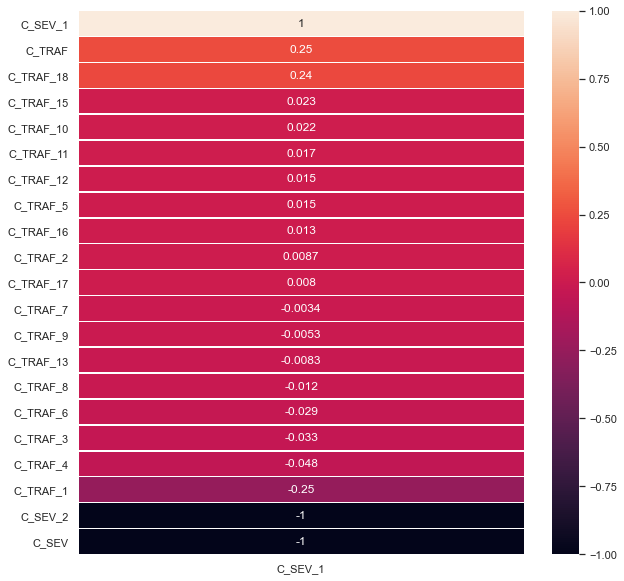

In [54]:
corr = car_undersampled2.corr()[['C_SEV_1']].sort_values(by='C_SEV_1', ascending=False)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot=True,linewidths=.5, ax=ax)
plt.show()

Donde:
- C_TRAF_1 : Traffic signals fully operational
- C_TRAF_2 : Traffic signals in flashing mode
- C_TRAF_3 : Stop sign
- C_TRAF_4 : Yield sign
- C_TRAF_5 : Warning sign
- C_TRAF_6 : Pedestrian crosswalk
- C_TRAF_7 : Police officer
- C_TRAF_8 : School guard, flagman
- C_TRAF_9 : School crossing
- C_TRAF_10 : Reduced speed zone
- C_TRAF_11 : No passing zone sign
- C_TRAF_12 : Markings on the road
- C_TRAF_13 : School bus stopped with school bus signal lights flashing
- C_TRAF_15 : Railway crossing with signals, or signals and gates
- C_TRAF_16 : Railway crossing with signs only
- C_TRAF_17 : Control device not specified
- C_TRAF_18 : No control present

Podemos ver que __C_SEV_1__ tiene una mayor correlación con C_TRAF_18, No control present, algo bastante coherente ya que al no haber ningún tipo de control la gente conduce con menos cuidado y a mayor velocidad y esto solo hace que las probabilidades de sufrir accidentes sean mayores.

Además podemos observar que C_TRAF_1 tiene una correlación inversa con C_SEV_1 de valor muy similar al de C_TRAF_18.
Es un resultado que podría ser esperado ya que a menor cantidad de señales operativas más accidentes mortales se producen.

A continuación estudiaremos cómo se relacionan las condiciones climatológicas con la variable objetivo:

In [55]:
#ONE HOT ENCODING PARA 'C_WTHR'
ohe = OneHotEncoder()
oh_array = ohe.fit_transform(car_undersampled['C_WTHR'].values.reshape(-1, 1)).toarray()
oh_df = pd.DataFrame(oh_array,columns=['C_WTHR_1','C_WTHR_2','C_WTHR_3','C_WTHR_4','C_WTHR_5','C_WTHR_6','C_WTHR_7'])
oh_df

,C_WTHR_1,C_WTHR_2,C_WTHR_3,C_WTHR_4,C_WTHR_5,C_WTHR_6,C_WTHR_7
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
197221,1.0,0.0,0.0,0.0,0.0,0.0,0.0
197222,1.0,0.0,0.0,0.0,0.0,0.0,0.0
197223,1.0,0.0,0.0,0.0,0.0,0.0,0.0
197224,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
car_undersampled3 =car_undersampled.merge(oh_df,how='left',left_index=True,right_index=True)

In [57]:
car_undersampled3.drop(['C_MNTH','C_HOUR','C_YEAR','C_WDAY','C_VEHS','C_CONF','C_RCFG','C_TRAF','C_RSUR','C_RALN','V_ID','V_TYPE','V_YEAR','P_ID','P_SEX','P_AGE','P_PSN','P_ISEV','P_SAFE','P_USER'],axis=1,inplace=True)

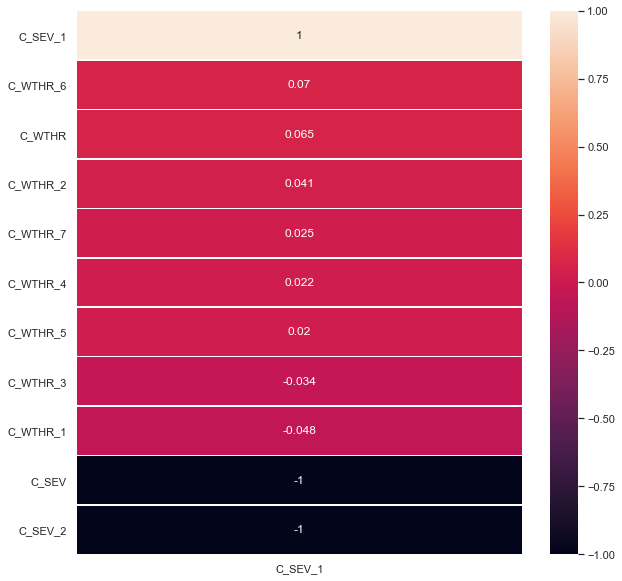

In [58]:
corr = car_undersampled3.corr()[['C_SEV_1']].sort_values(by='C_SEV_1', ascending=False)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot=True,linewidths=.5, ax=ax)
plt.show()

Podemos ver que las correlaciones que tiene C_SEV_1 con todas las variables son practimcanente insignificantes, tanto directa como inversamente, esto nos quiere decir que ningun tipo de condición climática condiciona verdaderamente el hecho de tener o no accidentes mortales en la carretera.

In [59]:
car_undersampled = car_undersampled.drop(['C_SEV_1','C_SEV_2'], axis=1)

### 2.7 Selección de variables

Para la selección de variables elegiremos una técnica conocida como técnica de filtrado, en el procesamiento de datos, se refiere a la aplicación de filtros o reglas para seleccionar o excluir ciertos datos con base en criterios específicos.

En este caso queremos seleccionar las variables más relevantes para el análisis.

In [60]:
X1 = car_undersampled.iloc[:, [0,1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].values
y1 = car_undersampled['C_SEV'].values
Feature_names1 = car_undersampled.iloc[:, [0,1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].columns.values

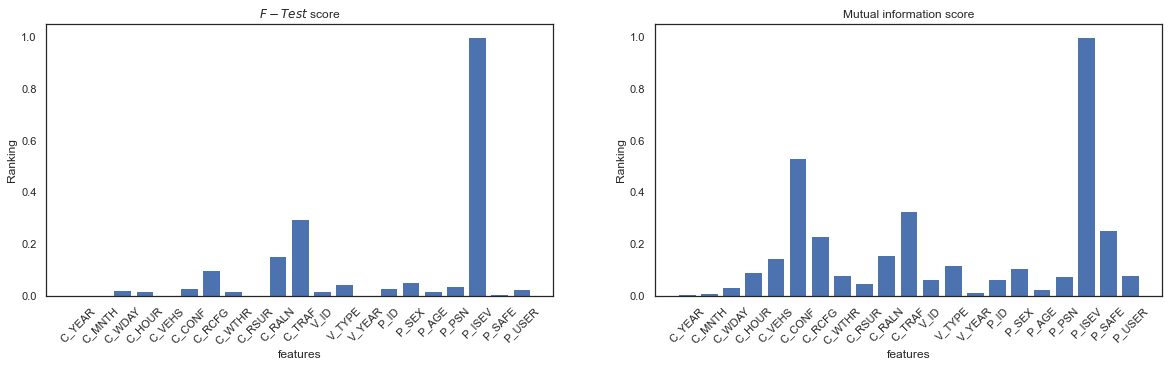

In [61]:
from sklearn.feature_selection import f_classif, mutual_info_classif

f_test, _ = f_classif(X1, y1)
f_test /= np.max(f_test)

mi = mutual_info_classif(X1, y1)
mi /= np.max(mi)

plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
plt.bar(range(X1.shape[1]),f_test,  align="center")
plt.xticks(range(X1.shape[1]),Feature_names1, rotation = 45)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('$F-Test$ score')

plt.subplot(1,2,2)
plt.bar(range(X1.shape[1]),mi,  align="center")
plt.xticks(range(X1.shape[1]),Feature_names1, rotation = 45)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('Mutual information score')

plt.show()

Nos fijamos en el gráfico de `mutual information score` ya que al tener una gran cantidad de datos es más preciso que el `F-Test score`.
Escogeremos las variables que tengan un mayor peso sobre la variable objetivo

Eliminamos las sobrantes, para obtener una tabla final con la que trabajaremos en los distintos modelos

In [62]:
car_undersampled = car_undersampled.drop(['C_YEAR','C_MNTH','C_WDAY','C_HOUR','C_VEHS','C_WTHR','C_RSUR','V_ID','V_YEAR','P_ID','P_SEX','P_AGE','P_PSN','P_USER'], axis=1)

In [63]:
car_undersampled

,C_SEV,C_CONF,C_RCFG,C_RALN,C_TRAF,V_TYPE,P_ISEV,P_SAFE
0,1.0,4.0,2.0,4.0,18.0,6.0,3.0,2.0
1,1.0,1.0,2.0,1.0,6.0,1.0,1.0,2.0
2,1.0,1.0,2.0,1.0,6.0,1.0,3.0,2.0
3,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0
4,1.0,1.0,2.0,1.0,1.0,1.0,3.0,2.0
...,...,...,...,...,...,...,...,...
197221,2.0,21.0,1.0,1.0,18.0,8.0,2.0,2.0
197222,2.0,35.0,2.0,1.0,1.0,1.0,2.0,2.0
197223,2.0,36.0,3.0,2.0,18.0,1.0,1.0,2.0
197224,2.0,21.0,2.0,1.0,1.0,1.0,1.0,2.0


In [64]:
car_undersampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197226 entries, 0 to 197225
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   C_SEV   197226 non-null  float64
 1   C_CONF  197226 non-null  float64
 2   C_RCFG  197226 non-null  float64
 3   C_RALN  197226 non-null  float64
 4   C_TRAF  197226 non-null  float64
 5   V_TYPE  197226 non-null  float64
 6   P_ISEV  197226 non-null  float64
 7   P_SAFE  197226 non-null  float64
dtypes: float64(8)
memory usage: 12.0 MB


### 2.8 Datos de Train y Test

En primer lugar creamos los subconjuntos de train y test para poder entrenar el modelo:

Para la `X` tomamos las columnas asociadas a la variables que nos hemos quedado en la tabla final.

`y` será la variable a predecir: `C_SEV`

In [65]:
y = car_undersampled['C_SEV'].values
X = car_undersampled.iloc[:,1:].values

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [67]:
X_train.shape, X_test.shape

((157780, 7), (39446, 7))

### 2.9 Estandarización de variables

Estandarizamos las variables para que todas ellas estén en la misma medida y no existan problemas en ciertos modelos en los que la no estandarización podría ser perjudicial.

In [68]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 3. Algoritmos de Clasificación

A continuación vamos a llevar a cabo los algoritmos de clasificación con la base de datos ya limpia y balanceada a través del método undersampling, donde inlcuiremos en cada uno de ellos las métricas elegidas.

`MÉTRICAS`:

`Accuracy`: Es una métrica que representa el porcentaje total de valores clasificados correctamente, tanto los positivos como los negativos. Será recomendable hacer uso de esta métrica en estudios en los que los datos están balanceados, lo que signiifca que haya misma cantidad de valores de cada clase. Esto es así porque tiene sensibilidad al desbalance. Una de sus desventajas es que omite información sobre los errores cometidos: La precisión no proporciona información detallada sobre los errores cometidos por el modelo. No distingue entre diferentes tipos de errores, como falsos positivos y falsos negativos. 
La manera de calcularla es la siguiente:

    - (VP + VN) / (VP + VN + FP + FN) donde: 
    
                                         - VP: Verdadero positivo
                                         - VN: Verdadero negtaivo
                                         - FP: Falso positivo
                                         - FN: Falso negativo
                          

`Matriz de confusión`: Es una matriz en la que cada columna representa el número de predicciones de cada clase, mientras que cada fila representa los valores de la clase real. Una de sus ventajas de las matrices de confusión es que son muy visuales a la hora de determinar que clases se están confundiendo. Los elementos de la diagonal de la matriz son aquellos en los que la clasificación es acertada, mientras que el resto de valores representan los errores. 

`Precision`: Esta métrica representa el porcentaje de valores que se han clasificado como positivos siendo positivos. La manera de calcularla es la siguiente: 

     - VP / (VP + FP).

`Recall`: Esta métrica es utilizada para evaluar la capacidad de un modelo para identificar correctamente todas las muestras positivas.  
La manera de calcularla es la siguiente: 

     - VP / (VP + FN).

`F-Score`: El valor F1 se utiliza para combinar las medidas descritas previamente de `precision` y `recall` en un sólo valor. Esta es una métrica muy utilizada en problemas en los que el conjunto de datos a analizar está desbalanceado, ya que no se ve afectada por esa problemática. 
La manera de calcularla es la siguiente: 

     - F1 = 2 * ((recall * precision)/(recall + precision))

`Curva ROC`: La curva ROC es un gráfico de gran utilidad que representa el porcentaje de verdaderos positivos, también conocido como Recall, contra el ratio de falsos positivos. 
Es decir, es útil para comparar diferentes modelos de clasificación y para seleccionar el mejor umbral de decisión según las necesidades del problema. Además, el AUC-ROC proporciona una medida del rendimiento del modelo, independiente del umbral de clasificación elegido.
Viene dado por la siguiente métrica:

- `Área bajo la curva (AUC)`: El AUC representa la probabilidad de que el modelo clasifique correctamente un valor aleatorio positivo por encima de un valor aleatorio negativo. El valor del AUC está en el intervalo con límite inferior: 0 y límite superior: 1. Un AUC de 0.5 indica que el modelo tiene un rendimiento similar al azar, por tanto no será considerado un buen resultado, mientras que un AUC de 1 indica un rendimiento perfecto, es decir, el modelo puede distinguir perfectamente entre las clases positivas y negativas.

In [69]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics

### 3.1 KNN

In [70]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [71]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [72]:
y_pred = knn.predict(X_test)

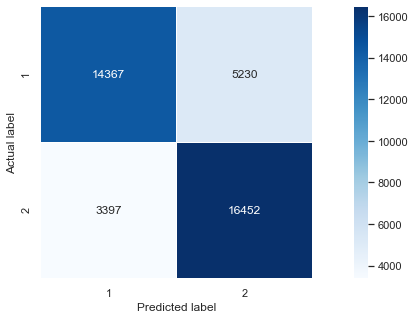

In [73]:
C = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15,5))
sns.heatmap(data=C,linewidths=.5, annot=True, square = True,  cmap = 'Blues',fmt='g',xticklabels=['1','2'],yticklabels=['1','2'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [74]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred,target_names=['1','2']))

              precision    recall  f1-score   support

           1       0.81      0.73      0.77     19597
           2       0.76      0.83      0.79     19849

    accuracy                           0.78     39446
   macro avg       0.78      0.78      0.78     39446
weighted avg       0.78      0.78      0.78     39446



In [75]:
def plot_roc_curve(test_y, pred_y):
    # Tasa de falsos positivos, tasa de verdaderos positivos
    fprs, tprs, thresholds = roc_curve(test_y, pred_y, pos_label=1)

    # gráfico ROC-AUC
    plt.figure(figsize=(8, 8))
    plt.plot([0, 1], [0, 1], linestyle="-", c="k", alpha=0.2, label="ROC-AUC=0.5")
    plt.plot(fprs, tprs, color="pink", label="ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

    # Rellena el área correspondiente a la puntuación ROC-AUC
    y_zeros = [0 for _ in tprs]
    plt.fill_between(fprs, y_zeros, tprs, color="pink", alpha=0.3, label="ROC-AUC")
    plt.legend()
    plt.show()

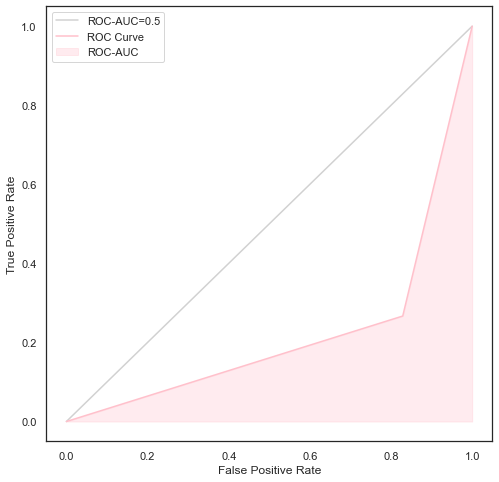

In [76]:
plot_roc_curve(y_test, y_pred)

In [77]:
roc_auc_score(y_test, y_pred)

0.7809901468337825

### 3.2 Árbol de decisión

In [78]:
from sklearn.tree import DecisionTreeClassifier
arbol = DecisionTreeClassifier(max_depth=8)
arbol

DecisionTreeClassifier(max_depth=8)

In [79]:
arbol.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8)

In [80]:
y_pred = arbol.predict(X_test)

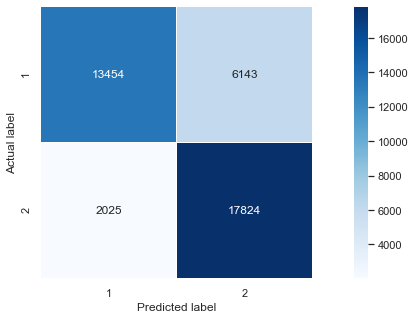

In [81]:
C = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15,5))
sns.heatmap(data=C,linewidths=.5, annot=True, square = True,  cmap = 'Blues',fmt='g',xticklabels=['1','2'],yticklabels=['1','2'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [82]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred,target_names=['1','2']))

              precision    recall  f1-score   support

           1       0.87      0.69      0.77     19597
           2       0.74      0.90      0.81     19849

    accuracy                           0.79     39446
   macro avg       0.81      0.79      0.79     39446
weighted avg       0.81      0.79      0.79     39446



In [83]:
def plot_roc_curve(test_y, pred_y):
    # Tasa de falsos positivos, tasa de verdaderos positivos
    fprs, tprs, thresholds = roc_curve(test_y, pred_y, pos_label=1)

    # gráfico ROC-AUC
    plt.figure(figsize=(8, 8))
    plt.plot([0, 1], [0, 1], linestyle="-", c="k", alpha=0.2, label="ROC-AUC=0.5")
    plt.plot(fprs, tprs, color="pink", label="ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

    # Rellena el área correspondiente a la puntuación ROC-AUC
    y_zeros = [0 for _ in tprs]
    plt.fill_between(fprs, y_zeros, tprs, color="pink", alpha=0.3, label="ROC-AUC")
    plt.legend()
    plt.show()

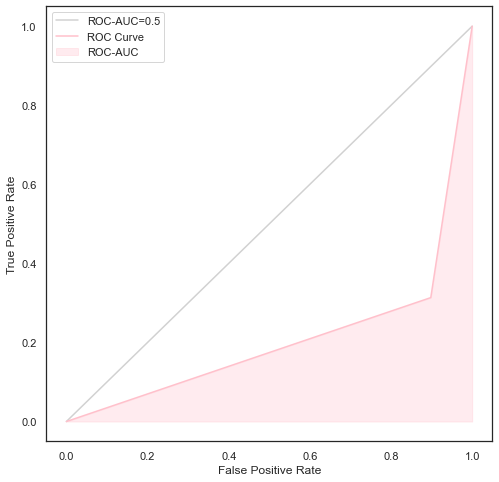

In [84]:
plot_roc_curve(y_test, y_pred)

In [85]:
roc_auc_score(y_test, y_pred)

0.7922567001003518

### 3.3 Bagging

In [86]:
from sklearn.ensemble import BaggingClassifier
bag=BaggingClassifier(base_estimator=None, n_estimators=10)

In [87]:
bag.fit(X_train,y_train)

BaggingClassifier()

In [88]:
y_pred = bag.predict(X_test)

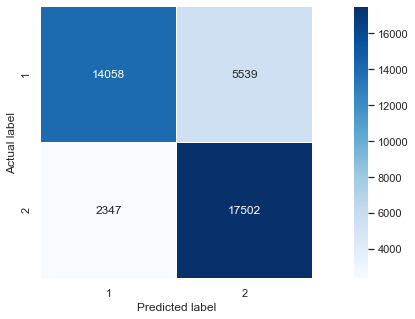

In [89]:
C = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15,5))
sns.heatmap(data=C,linewidths=.5, annot=True, square = True,  cmap = 'Blues',fmt='g',xticklabels=['1','2'],yticklabels=['1','2'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [90]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred,target_names=['1','2']))

              precision    recall  f1-score   support

           1       0.86      0.72      0.78     19597
           2       0.76      0.88      0.82     19849

    accuracy                           0.80     39446
   macro avg       0.81      0.80      0.80     39446
weighted avg       0.81      0.80      0.80     39446



In [91]:
def plot_roc_curve(test_y, pred_y):
    # Tasa de falsos positivos, tasa de verdaderos positivos
    fprs, tprs, thresholds = roc_curve(test_y, pred_y, pos_label=1)

    # gráfico ROC-AUC
    plt.figure(figsize=(8, 8))
    plt.plot([0, 1], [0, 1], linestyle="-", c="k", alpha=0.2, label="ROC-AUC=0.5")
    plt.plot(fprs, tprs, color="pink", label="ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

    # Rellena el área correspondiente a la puntuación ROC-AUC
    y_zeros = [0 for _ in tprs]
    plt.fill_between(fprs, y_zeros, tprs, color="pink", alpha=0.3, label="ROC-AUC")
    plt.legend()
    plt.show()

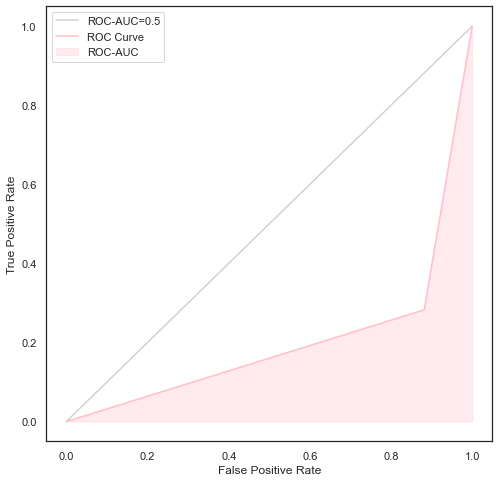

In [92]:
plot_roc_curve(y_test, y_pred)

In [93]:
roc_auc_score(y_test, y_pred)

0.799555982258078

### 3.4 Random Forest

In [94]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

In [95]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [96]:
y_pred = rf.predict(X_test)

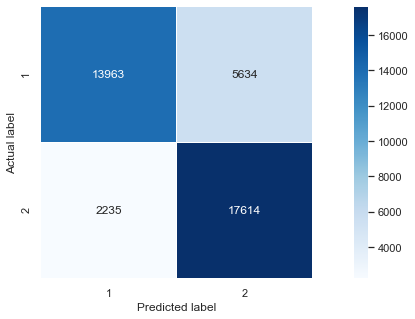

In [97]:
C = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15,5))
sns.heatmap(data=C,linewidths=.5, annot=True, square = True,  cmap = 'Blues',fmt='g',xticklabels=['1','2'],yticklabels=['1','2'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [98]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred,target_names=['1','2']))

              precision    recall  f1-score   support

           1       0.86      0.71      0.78     19597
           2       0.76      0.89      0.82     19849

    accuracy                           0.80     39446
   macro avg       0.81      0.80      0.80     39446
weighted avg       0.81      0.80      0.80     39446



In [99]:
def plot_roc_curve(test_y, pred_y):
    # Tasa de falsos positivos, tasa de verdaderos positivos
    fprs, tprs, thresholds = roc_curve(test_y, pred_y, pos_label=1)

    # gráfico ROC-AUC
    plt.figure(figsize=(8, 8))
    plt.plot([0, 1], [0, 1], linestyle="-", c="k", alpha=0.2, label="ROC-AUC=0.5")
    plt.plot(fprs, tprs, color="pink", label="ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

    # Rellena el área correspondiente a la puntuación ROC-AUC
    y_zeros = [0 for _ in tprs]
    plt.fill_between(fprs, y_zeros, tprs, color="pink", alpha=0.3, label="ROC-AUC")
    plt.legend()
    plt.show()

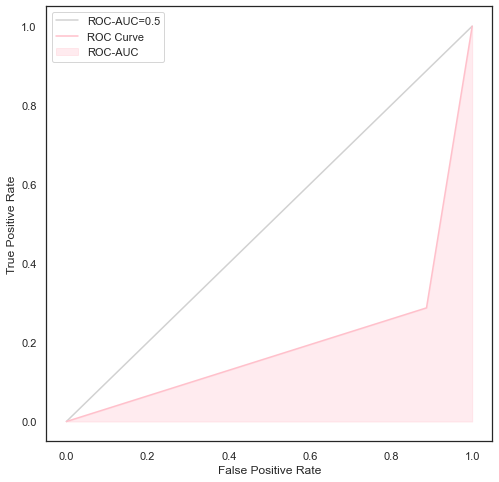

In [100]:
plot_roc_curve(y_test, y_pred)

In [101]:
roc_auc_score(y_test, y_pred)

0.7999534426955458

### 2.6 Gradient Boost

In [102]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(random_state=0)

In [103]:
grad.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [104]:
y_pred = grad.predict(X_test)

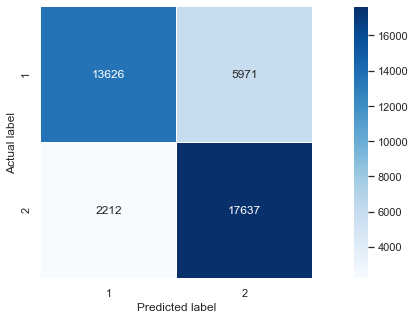

In [105]:
C = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15,5))
sns.heatmap(data=C,linewidths=.5, annot=True, square = True,  cmap = 'Blues',fmt='g',xticklabels=['1','2'],yticklabels=['1','2'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [106]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred,target_names=['1','2']))

              precision    recall  f1-score   support

           1       0.86      0.70      0.77     19597
           2       0.75      0.89      0.81     19849

    accuracy                           0.79     39446
   macro avg       0.80      0.79      0.79     39446
weighted avg       0.80      0.79      0.79     39446



In [107]:
def plot_roc_curve(test_y, pred_y):
    # Tasa de falsos positivos, tasa de verdaderos positivos
    fprs, tprs, thresholds = roc_curve(test_y, pred_y, pos_label=1)

    # gráfico ROC-AUC
    plt.figure(figsize=(8, 8))
    plt.plot([0, 1], [0, 1], linestyle="-", c="k", alpha=0.2, label="ROC-AUC=0.5")
    plt.plot(fprs, tprs, color="pink", label="ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

    # Rellena el área correspondiente a la puntuación ROC-AUC
    y_zeros = [0 for _ in tprs]
    plt.fill_between(fprs, y_zeros, tprs, color="pink", alpha=0.3, label="ROC-AUC")
    plt.legend()
    plt.show()

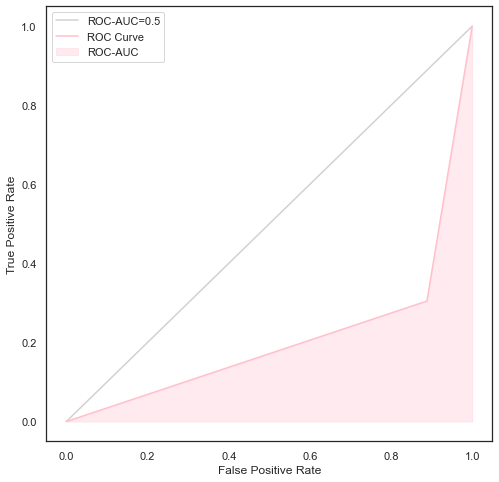

In [108]:
plot_roc_curve(y_test, y_pred)

In [109]:
roc_auc_score(y_test, y_pred)

0.7919345621364042

### 3.6 XGBoost

In [110]:
import xgboost as xgb

In [111]:
from xgboost import XGBClassifier

Como el XGBoost solo trabaja con 0 y 1 convertiremos los 1 y 2 ya que si no no seremos capaces de utilizar este modelo. Es solo una transformación de notación pero no varía nada más.

In [112]:
import numpy as np

valor_antiguo = 1
nuevo_valor = 0

y_train = np.where(y_train == valor_antiguo, nuevo_valor, y_train)

valor_antiguo1 = 2
nuevo_valor1 = 1


y_train = np.where(y_train == valor_antiguo1, nuevo_valor1, y_train)

In [113]:
valor_antiguo2 = 1
nuevo_valor2 = 0

y_test = np.where(y_test == valor_antiguo2, nuevo_valor2, y_test)

valor_antiguo3 = 2
nuevo_valor3 = 1


y_test = np.where(y_test == valor_antiguo3, nuevo_valor3, y_test)

In [114]:
xgb = XGBClassifier()

In [115]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [116]:
y_pred = xgb.predict(X_test)

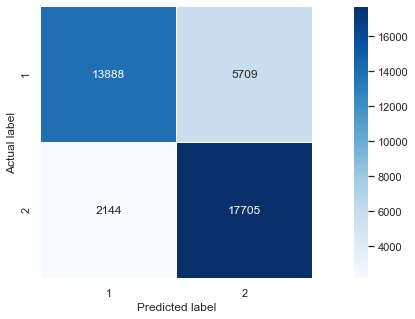

In [117]:
C = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15,5))
sns.heatmap(data=C,linewidths=.5, annot=True, square = True,  cmap = 'Blues',fmt='g',xticklabels=['1','2'],yticklabels=['1','2'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [118]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred,target_names=['1','2']))

              precision    recall  f1-score   support

           1       0.87      0.71      0.78     19597
           2       0.76      0.89      0.82     19849

    accuracy                           0.80     39446
   macro avg       0.81      0.80      0.80     39446
weighted avg       0.81      0.80      0.80     39446



In [119]:
def plot_roc_curve(test_y, pred_y):
    # Tasa de falsos positivos, tasa de verdaderos positivos
    fprs, tprs, thresholds = roc_curve(test_y, pred_y, pos_label=1)

    # gráfico ROC-AUC
    plt.figure(figsize=(8, 8))
    plt.plot([0, 1], [0, 1], linestyle="-", c="k", alpha=0.2, label="ROC-AUC=0.5")
    plt.plot(fprs, tprs, color="pink", label="ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

    # Rellena el área correspondiente a la puntuación ROC-AUC
    y_zeros = [0 for _ in tprs]
    plt.fill_between(fprs, y_zeros, tprs, color="pink", alpha=0.3, label="ROC-AUC")
    plt.legend()
    plt.show()

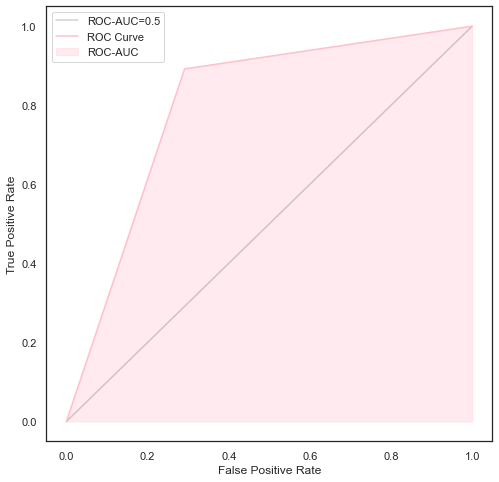

In [120]:
plot_roc_curve(y_test, y_pred)

In [121]:
roc_auc_score(y_test, y_pred)

0.8003321914150874

### 3.7 Naive Bayes

In [122]:
from sklearn.metrics import accuracy_score

In [123]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_pred, y_test))

0.7072199969578664


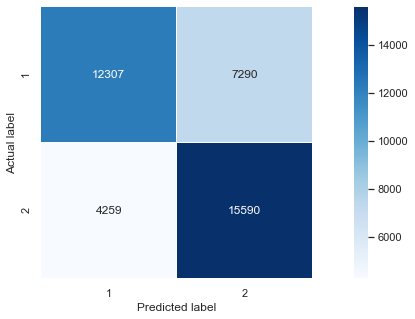

In [124]:
C = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15,5))
sns.heatmap(data=C,linewidths=.5, annot=True, square = True,  cmap = 'Blues', fmt='g', xticklabels=['1','2'], yticklabels=['1','2'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [125]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred,target_names=['1','2']))

              precision    recall  f1-score   support

           1       0.74      0.63      0.68     19597
           2       0.68      0.79      0.73     19849

    accuracy                           0.71     39446
   macro avg       0.71      0.71      0.71     39446
weighted avg       0.71      0.71      0.71     39446



In [126]:
def plot_roc_curve(test_y, pred_y):
    # Tasa de falsos positivos, tasa de verdaderos positivos
    fprs, tprs, thresholds = roc_curve(test_y, pred_y, pos_label=1)

    # gráfico ROC-AUC
    plt.figure(figsize=(8, 8))
    plt.plot([0, 1], [0, 1], linestyle="-", c="k", alpha=0.2, label="ROC-AUC=0.5")
    plt.plot(fprs, tprs, color="pink", label="ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

    # Rellena el área correspondiente a la puntuación ROC-AUC
    y_zeros = [0 for _ in tprs]
    plt.fill_between(fprs, y_zeros, tprs, color="pink", alpha=0.3, label="ROC-AUC")
    plt.legend()
    plt.show()

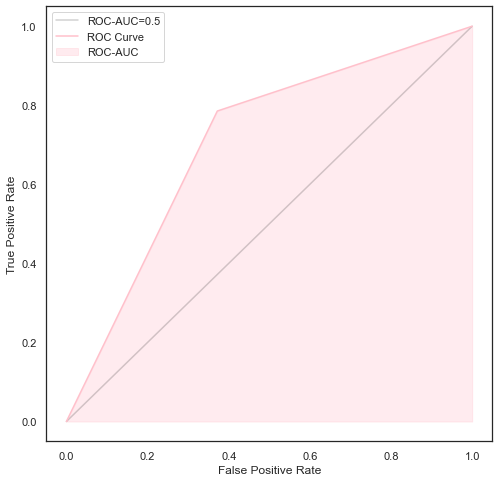

In [127]:
plot_roc_curve(y_test, y_pred)

In [128]:
roc_auc_score(y_test, y_pred)

0.7067171414218683

## 4. Elección de la métrica más adecuada

Para determinar la mejor métrica debemos analizar en qué situación nos encontramos poniendonos en el lugar de la aseguradora. 

La variable objetivo ya hemos visto que se divide en dos, siendo:

- `1`: Accidentes mortales
- `2`: Accidentes leves

Es claro que equivocarse en la clasificación de ambas situaciones puede tener consecuencias a la hora de determinar si los nuevos clientes con ciertas características pertenecen a un grupo u otro.

Pero creemos que clasificar un '1' como un '2' es una situación peor para la aseguradora, ya que los accidentes mortales conllevan mayor cantidad de pagos y estaríamos determinando falsamente que un cliente pertenece al grupo de accidentes leves cuando realmente no es así. Es decir, la aseguradora le cobraría una cuota menor de la que le corresponde y si finalmente tuviese un accidente de gravedad podría llegar a provocar grandes pérdidas.

Aun así la clasificación errónea de los '2' podría llevar a una pérdida de clientes ya que estarían pagando una cuota mayor de la que les corresponde y podrían buscar otras opciones en la competencia. Por tanto intentaremos también que el acierto en este caso sea lo mayor posible.

En definitiva queremos asegurar principalmente que los '1' estén clasificados de la mejor manera posible.

Para cercionarnos de que esa situación se dé aunque buscamos una predicción total buena, nos centraremos en las métricas que nos den la mejor clasificación de los '1'.

Esa métrica es la de `precision`.

Como tampoco nos interesa que los '2' estén mal clasificados, para ello no usaremos `precision` porque da resultados peores que `recall`, que será la métrica elegida.

No haremos uso de la Curva ROC por el hecho de que los resultados obtenidos en muchos de los modelos son muy similares y eso hace más difícil la elección final del mismo.

Teniendo en cuenta ambas métricas (recall para los '2' y precison para los '1') seleccionaremos el mejor modelo, es decir, en el que ambas métricas tengan el valor más alto posible priorizando la clasificación correcta de los '1'.

- `KNN`: 

         - precision: 0.81
         - recall: 0.83
       
- `Árbol de decisión`: 

         - precision: 0.87
         - recall: 0.90
         
- `Bagging`: 

         - precision: 0.86
         - recall: 0.88
         
- `Random Forest`: 

         - precision: 0.86
         - recall: 0.89

- `Gradient Boost`: 

         - precision: 0.86
         - recall: 0.89

- `XGBoost`: 

         - precision: 0.87
         - recall: 0.89
         
- `Naive Bayes`: 

         - precision: 0.74
         - recall: 0.79

Vemos que los dos posibles modelos a elegir son `XGBoost` y `Árboles de decisión` donde en ambos los '1' están clasificados con un 87% de acierto (un resultado bastante bueno). 

Pero si tenemos en cuenta la clasificación  del '2' vemos que en `XGBoost`: recall: 0.89 y en `Árbol de decisión`: recall: 0.90. 

Pero fijándonos también en la accuray:
`XGBoost`: 0.80 y en `Árbol de decisión`: 0.79. 

Decidimos que es mejor tener una predicción aunque sea un 1% mejor en el total que en la clasificación de los '2'. 

Por tanto el mejor modelo será `XGBoost`, aunque en realidad podemos ver que muchos de los modelos nos dan resultados muy parecidos variando únicamente en un 1%.

En conclusión, los resultados de las predicciones con las métricas elegidas y el modelo elegido son muy favorables. Además debemos recalcar que estos resultados han sido obtenidos con un balanceo de tipo undersampling por tanto son resultados más conservadores que si se hubiese hecho con un oversampling.


## 5. Importancia de las variables en el modelo elegido

Haremos uso del modelo `XGBoost` ya que ha sido elegido cómo el modelo que mejor se ajusta a nuestro conjunto de datos.

Vemos primero en un array la importancia de las variables a la hora de predecir correctamente la variable objetivo:

Esta 'importancia' nos da una calificación de cómo de útil han sido las variables en la construcción del modelo.

In [129]:
xgb.feature_importances_

array([0.07034078, 0.03718036, 0.01604533, 0.0517585 , 0.03975544,
       0.7598124 , 0.02510714], dtype=float32)

In [130]:
car_undersampled.head()

,C_SEV,C_CONF,C_RCFG,C_RALN,C_TRAF,V_TYPE,P_ISEV,P_SAFE
0,1.0,4.0,2.0,4.0,18.0,6.0,3.0,2.0
1,1.0,1.0,2.0,1.0,6.0,1.0,1.0,2.0
2,1.0,1.0,2.0,1.0,6.0,1.0,3.0,2.0
3,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0
4,1.0,1.0,2.0,1.0,1.0,1.0,3.0,2.0


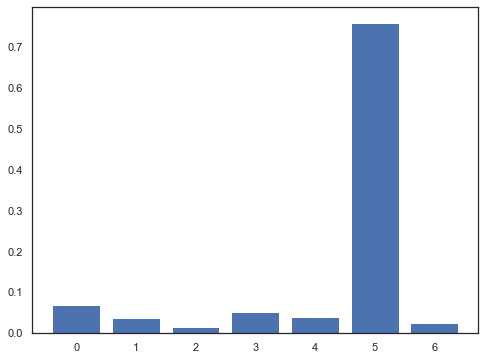

In [131]:
feature_importances = xgb.feature_importances_
x = range(len(feature_importances))

fig, ax = plt.subplots(figsize=(8,6))

plt.bar(x, feature_importances)

plt.show()

Vemos que la variable más importante con diferencia para este modelo ha sido `C_TRAF`. Previamente habíamos hecho un encoding para ver qué variable era la que más afectaba a la categoría de accidentes mortales en `C_SEV` por tanto es coherente que esta sea la variable más determinante a la hora de hacer el modelo.

## 6. Conclusiones

Si planteásemos este problema teniendo en cuenta las situaciones más beneficiosas para una aseguradora deberíamos valorar sobre todo:

- Que no se produzcan pérdidas por errores en la clasificación en el caso de accidentes graves, ya que clasificar a un conductor en el grupo 2, pensando que si sufre un accidente será leve, y que por el contrario este accidente sea grave causaría grandes pérdidas a la empresa. 


- Por otro lado que se de la situación de fuga de clientes por errores en la clasificación en los accidentes leves, ya que si a un asegurado se le asigna el grupo 1 que conlleva una mayor cuota, puede llevar a que este se plantee cambiarse de aseguradora y beneficiar a la competencia.

Para cumplir todas estos objetivos haremos uso de las métricas comentadas previamente, donde `precision` será para accidentes graves y `recall` para los leves. Estas métricas obtienen sus valores máximos en el modelo `XGBoost` donde 

        - Precision: 0.87
        - Recall: 0.89
        
Por tanto recomendaríamos a la aseguradora utilizar este modelo para clasificar a sus nuevos potenciales clientes.